### 1. Kontrola kvalitete podataka

#### Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget
import seaborn as sns
from scipy.stats import skew, kurtosis, chi2_contingency
from IPython.display import display
import scipy.stats as stats
from scipy.stats import norm

Čitanje podataka iz csv file-a, te prikaz nekoliko prvih redaka.

In [3]:
ct = pd.read_csv("data.csv")
ct.head()

,Unnamed: 0,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,0,948,2,48,89.8128,0,0,0,100,0,...,0,1,0,1,0,422,477,566,324,0
1,1,1002,3,61,49.4424,0,0,0,90,0,...,1,3,0,1,0,162,218,392,564,1
2,2,961,3,45,88.4520,0,1,1,90,0,...,1,3,0,1,1,326,274,2063,1893,0
3,3,1166,3,47,85.2768,0,1,0,100,0,...,1,3,0,1,0,287,394,1590,966,0
4,4,1090,0,43,66.6792,0,1,0,100,0,...,1,3,0,0,0,504,353,870,782,0


Učitali smo dataset pomoću Pandas biblioteke i funkcije "read_csv.". Funkcija head() ispisuje prvih 5 redaka po defaultu. Po potrebi možemo unesti broj željenih redaka za ispis kao argument funkcije.

Funkcija tail() slično kao i head() koristi se za ispisivanje zadnjih 5 redaka ukoliko nije upisan broj željenih redaka kao argument funkcije.

In [4]:
ct.tail()

,Unnamed: 0,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
2134,2134,1091,3,21,53.2980,1,0,0,100,0,...,1,3,0,1,1,152,109,561,720,0
2135,2135,395,0,17,102.9672,1,0,0,100,0,...,1,3,0,0,1,373,218,1759,1030,0
2136,2136,1104,2,53,69.8544,1,1,0,90,0,...,1,3,0,1,0,419,364,1391,1041,0
2137,2137,465,0,14,60.0000,1,0,0,100,0,...,0,1,0,0,0,166,169,999,1838,1
2138,2138,1045,3,45,77.3000,1,0,0,100,0,...,0,1,0,1,0,911,930,885,526,0


Pomoću svojstva "shape" možemo vidjeti ukupnu veličinu našeg dataseta. Vidimo da se dataset sastoji od 2139 redaka i 25 stupaca

In [5]:
ct.shape

(2139, 25)

## 1.1 Prepoznavanje nedostajućih vrijednosti 

Sad ćemo provjeriti da li postoje nedostajuće vrijednosti u retcima, te nekoliko prvih ispisati.
Korist ćemo axis=1 koji govori metodi any() da se operacija primjenjuje horizontalno.

In [6]:
missing_values= ct[ct.isna().any(axis=1)] # axis=1 za horizontalno, a 0 za vertikalno.
missing_values.head()

,Unnamed: 0,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid


Rezultati pokazuju da nemamo nedostajuće vrijednosti.

## 1.2 Rekodiranje nedostajućih vrijednosti  npr  .null. -> „missing“

Da bismo rekodirali nedostajuće vrijednosti u Pandas biblioteci, možemo koristiti funkciju "fillna" koja će zamijeniti sve nedostajuće vrijednosti sa stringom "missing" neovisno o tome jesu li podaci tipa string, integer itd. Pošto nismo imali nedostajuće vrijednosti, podaci će ostati nepromijenjeni. <br>

In [7]:
ct.fillna("missing", inplace=True)

## 1.3 Prepoznavanje unifromnih ili nelogičnih distribucija

Prvo moramo razumjeti koje varijable koristimo i koje varijable su kontinuirane, a koje kategoričke.
Za kontunirane varijable ćemo prvo napraviti statističe podatke, a za kategoričke frekvenciju pojavnosti.


### 1.3.1 Identifikacija Uniformnih ili Nelogičnih Distribucija za KONTINUIRANE varijable

Opis kontinuiranih varijabla:<br>

time - Vrijeme do neuspjeha ili cenzuriranja izraženo u danima.<br>

age - Dob pacijenta u godinama na početku studije.<br>

wtkg - Težina pacijenta u kilogramima na početku studije.<br>

karnof - Karnofsky ocjena, koja mjeri sposobnost pacijenta da obavlja svakodnevne aktivnosti (na skali od 0-100, gdje više vrijednosti ukazuju na bolje stanje).<br>

preanti- Broj dana antiretrovirusne terapije prije početka studije.<br>

cd40 - CD4 broj na početku studije. CD4 stanice su vrsta bijelih krvnih stanica koje igraju ključnu ulogu u imunološkom odgovoru. HIV napada i uništava CD4 stanice, što slabi imunološki sustav. Početni broj CD4 stanica može pružiti uvid u stupanj imunološkog oštećenja prije početka liječenja.<br>

cd420- CD4 broj na 20±5 tjedana. Praćenje promjene CD4 broja tijekom vremena omogućuje procjenu učinkovitosti antiretrovirusnog tretmana u obnovi imunološkog sustava.<br>

cd80 - CD8 broj na početku studije. CD8 stanice su još jedna vrsta bijelih krvnih stanica, poznate kao citotoksične T stanice, koje mogu ubijati zaražene stanice. U kontekstu HIV-a, visoki CD8 brojevi mogu odražavati pokušaj tijela da se bori protiv virusa.<br>

cd820 - CD8 broj na 20±5 tjedana. Kao i kod CD4, promjene u broju CD8 stanica tijekom vremena mogu pružiti uvid u imunološki odgovor na antiretrovirusni tretman.<br>

#### 1.3.1.1 Deskriptivna statistika

Deskriptivna statistika obuhvaća različite statističke metode i tehnike koje se koriste za opisivanje i sumiranje karakteristika skupa podataka.

Pomoću funkcije describe napravit ćemo deskriptivnu analizu za numeričke, odnosno kontinuirane varijable.

Funkcija describe izračunava osnovne informacije kao što su:<br>
- count: predstavlja pojavljivanja vrijednosti za svaku numeričku varijablu
- srednja vrijednost: mean,
- standardna devijacija: std
- minimalna vrijednost u varijabli: min
- kvartil 25% - (prvi kvartil) vrijednost ispod koje se nalazi 25% podataka
- kvartil 50% - (medijan ili drugi kvartil) vrijednost ispod koje se nalazi 50% podataka
- kvartil 75% - (treći kvartil) vrijednost ispod koje se nalazi 75% podataka
- maksimalna vrijednost u varijabli: max


In [8]:
# Lista kontinuiranih varijabli
continuous_vars = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Statistički pregled za kontinuirane, odnosno numeričke varijable
statistic_data = ct[continuous_vars].describe()

print(statistic_data)

# spremanje u excel koji nije potrebno
# excel_file_path = 'statisticki_podaci_kontinuiranih_varijabli.xlsx'
# statistic_data.to_excel(excel_file_path)


              time          age         wtkg       karnof      preanti  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean    879.098177    35.248247    75.125311    95.446470   379.175783   
std     292.274324     8.709026    13.263164     5.900985   468.657526   
min      14.000000    12.000000    31.000000    70.000000     0.000000   
25%     727.000000    29.000000    66.679200    90.000000     0.000000   
50%     997.000000    34.000000    74.390400   100.000000   142.000000   
75%    1091.000000    40.000000    82.555200   100.000000   739.500000   
max    1231.000000    70.000000   159.939360   100.000000  2851.000000   

              cd40        cd420         cd80        cd820  
count  2139.000000  2139.000000  2139.000000  2139.000000  
mean    350.501169   371.307153   986.627396   935.369799  
std     118.573863   144.634909   480.197750   444.976051  
min       0.000000    49.000000    40.000000   124.000000  
25%     263.500000   269.000000  

##### Komentar na rezultate

Vidljivo je iz podataka da nema missing value, odnosno da za svaku varijablu ima 2139 redaka.

Kod varijabli 'preanti', 'cd80' i 'cd820' vidljiva je velika standardna devijacija, što ukazuje na širok raspon vrijednosti i prisutnost ekstrema. Ovo pokazuje na nelogičnu distribuciju unutar tih varijabli.

Nasuprot tome, varijable "age", "wtkg", i "karnof" karakterizira mala standardna devijacija što sugerira na uniformnu distribuciju.

Općenito o pacijentima:<br>
Prosječno vrijeme praćenja (time) je 879 dana, s rasponom od 14 do 1231 dana. Ovo sugerira da su neki pacijenti praćeni kroz znatno duže razdoblje u odnosu na druge, što može ukazivati na razlike u trajanju studije ili u prekidu praćenja (cenzuriranje). Srednja vrijednost za dob (age) pokazuje da su pacijenti relativno mladi, s prosječno 35 godina.

Težina pacijenata (wtkg) se kreće od 31 do skoro 160 kg, s prosječnom vrijednošću od 75 kg.

Varijabla preanti pokazuje da su neki pacijenti imali minimalno prethodno izlaganje antiretrovirusnoj terapiji, dok su drugi imali značajno duže terapije, što može utjecati na otpornost na lijekove ili odgovor na liječenje.

Brojčane vrijednosti CD4 i CD8 stanica (cd40, cd420, cd80, cd820) variraju kroz vremenske točke, što ukazuje na dinamične promjene u imunološkom statusu pacijenata kroz vrijeme. Razlike u brojevima CD4 i CD8 stanica mogu pružiti uvide u progresiju bolesti i učinkovitost imunosnog odgovora tijekom antiretrovirusne terapije.

#### 1.3.1.2 Histogrami


Distribuciju možemo prikazati i preko histograma. Napravit ćemo histogram za svaku kontinuiranu varijablu.

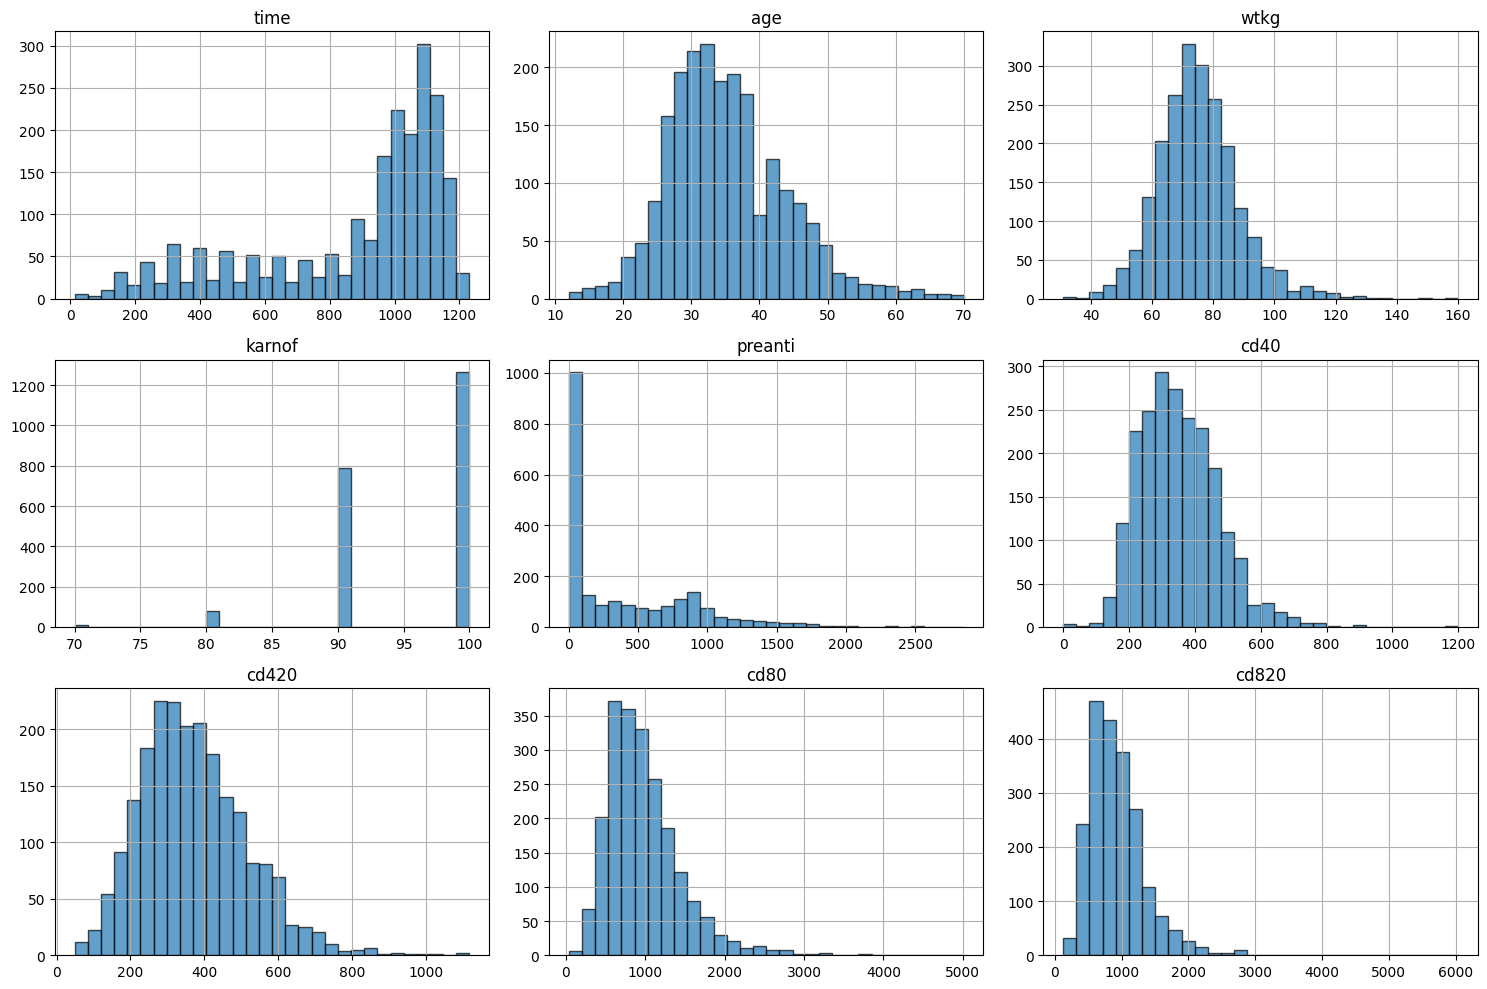

In [9]:
# Postavljanje veličine figure
plt.figure(figsize=(15, 10))

# Broj varijabli za kreiranje broja subplotova
num_vars = len(continuous_vars)
rows = 3  # Broj redova u gridu
cols = 3  # Broj stupaca u gridu

# Kreiranje histograma za svaku varijablu
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(rows, cols, i)
    plt.hist(ct[var], bins=30, edgecolor='k', alpha=0.7)
    plt.title(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Komentar na histogram

Nijedna od varijabli ne pokazuje uniformnu distribuciju, kao i nelogičnu distribuciju, koja bi ukazivala na greške u podacima.

Varijabla "time" ukazuje na to da većina pacijenata doživljava neuspjeh tretmana ili cenzuriranje kasnije.

Varijabla "age" pokazuje da postoji više mlađih pacijenata u studiji, što može biti odraz kriterija uključenja ili demografskih trendova unutar populacije oboljele od bolesti koja se proučava.

Težina pacijenata, kao što pokazuje "wtkg", teži normalnoj distribuciji, što je očekivano za varijablu poput tjelesne težine. 

Broj dana na antiretrovirusnoj terapiji prije studije ("preanti") pokazuje da su pacijenti uglavnom imali kratkotrajnu izloženost terapiji.

Broj CD4 i CD8 stanica u različitim vremenskim točkama ("cd40", "cd420", "cd80", "cd820") pokazuje različite stupnjeve varijabilnosti, što može ukazivati na različite faze bolesti ili različite imunološke odgovore među pacijentima.

#### 1.3.1.3 Izračun ekstremnih vrijednosti

#### 1.3.1.3.1 3σ(sigma) metoda

Pomoću 3 sigma metode identificirat ćemo eksrteme prema uvjetima:
- Donja granica: srednja vrijednost - 3 * standardna devijacija
- Gornja granica: srednja vrijednost + 3 * standardna devijacija

In [10]:
total_count = 2139  # Ukupan broj promatranja

for var in continuous_vars:
    mean_value = ct[var].mean()
    std_dev = ct[var].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev
    
    below_lower_bound = ct[ct[var] < lower_bound]
    above_upper_bound = ct[ct[var] > upper_bound]

    if not below_lower_bound.empty:
        percent_below_lower_bound = round((below_lower_bound.shape[0] / total_count) * 100, 2)  # Izračun i zaokruživanje
        print(f"Za donju granicu varijable '{var}':")
        print(f"Donja granica: {lower_bound}")
        print(f"Najmanja vrijednost: {ct[var].min()}")
        print(f"Broj vrijednosti ispod donje granice: {below_lower_bound.shape[0]}")
        print(f"Postotak vrijednosti ispod donje granice: {percent_below_lower_bound}%\n")  
    
    if not above_upper_bound.empty:
        percent_above_upper_bound = round((above_upper_bound.shape[0] / total_count) * 100, 2)  # Izračun i zaokruživanje
        print(f"Za gornju granicu varijable '{var}':")
        print(f"Gornja granica: {upper_bound}")
        print(f"Najveća vrijednost: {ct[var].max()}")
        print(f"Broj vrijednosti iznad gornje granice: {above_upper_bound.shape[0]}")
        print(f"Postotak vrijednosti iznad gornje granice: {percent_above_upper_bound}%\n") 

Za gornju granicu varijable 'age':
Gornja granica: 61.375325546345934
Najveća vrijednost: 70
Broj vrijednosti iznad gornje granice: 24
Postotak vrijednosti iznad gornje granice: 1.12%

Za donju granicu varijable 'wtkg':
Donja granica: 35.335818508379006
Najmanja vrijednost: 31.0
Broj vrijednosti ispod donje granice: 2
Postotak vrijednosti ispod donje granice: 0.09%

Za gornju granicu varijable 'wtkg':
Gornja granica: 114.91480252948917
Najveća vrijednost: 159.93936
Broj vrijednosti iznad gornje granice: 21
Postotak vrijednosti iznad gornje granice: 0.98%

Za donju granicu varijable 'karnof':
Donja granica: 77.74351664454053
Najmanja vrijednost: 70
Broj vrijednosti ispod donje granice: 9
Postotak vrijednosti ispod donje granice: 0.42%

Za gornju granicu varijable 'preanti':
Gornja granica: 1785.1483604344808
Najveća vrijednost: 2851
Broj vrijednosti iznad gornje granice: 14
Postotak vrijednosti iznad gornje granice: 0.65%

Za gornju granicu varijable 'cd40':
Gornja granica: 706.22275633

#### Komentar na rezultate 3 sigma 

Može se zaključiti da većina podataka leži unutar očekivanih granica normalne distribucije. Iako postoji manji postotak vrijednosti koje prelaze gornje granice za nekoliko varijabli, kao što su 'age', 'wtkg', 'cd40', 'cd420', 'cd80' i 'cd820', te vrijednosti ne čine značajan dio skupa podataka.


#### 1.3.1.3.2 Kutijasti dijagrami za kontinuirane varijable

Koristio sam kutijaste dijagrame pošto vizualno mogu na vrlo lagan način pokazati ekstreme u distribuciji podataka.
Kod kutijastih dijagrama ekstreme ćemo računati preko IQR metode.

Donje i gornje granice ekstrema prema interkvartilnom rasponu (IQR) metodi računaju se:
- IQR=Q3−Q1
- donja granjica: Q1−1.5×IQR
- gornja granica: Q3+1.5×IQR


Varijabla time:
  Broj ekstrema ispod donje granice: 49 (2.29%)
  Broj ekstrema iznad gornje granice: 0 (0.00%)
  Ukupan broj ekstrema: 49 (2.29%)

Varijabla age:
  Broj ekstrema ispod donje granice: 3 (0.14%)
  Broj ekstrema iznad gornje granice: 49 (2.29%)
  Ukupan broj ekstrema: 52 (2.43%)

Varijabla wtkg:
  Broj ekstrema ispod donje granice: 9 (0.42%)
  Broj ekstrema iznad gornje granice: 45 (2.10%)
  Ukupan broj ekstrema: 54 (2.52%)

Varijabla karnof:
  Broj ekstrema ispod donje granice: 9 (0.42%)
  Broj ekstrema iznad gornje granice: 0 (0.00%)
  Ukupan broj ekstrema: 9 (0.42%)

Varijabla preanti:
  Broj ekstrema ispod donje granice: 0 (0.00%)
  Broj ekstrema iznad gornje granice: 12 (0.56%)
  Ukupan broj ekstrema: 12 (0.56%)

Varijabla cd40:
  Broj ekstrema ispod donje granice: 3 (0.14%)
  Broj ekstrema iznad gornje granice: 28 (1.31%)
  Ukupan broj ekstrema: 31 (1.45%)

Varijabla cd420:
  Broj ekstrema ispod donje granice: 0 (0.00%)
  Broj ekstrema iznad gornje granice: 30 (1.40

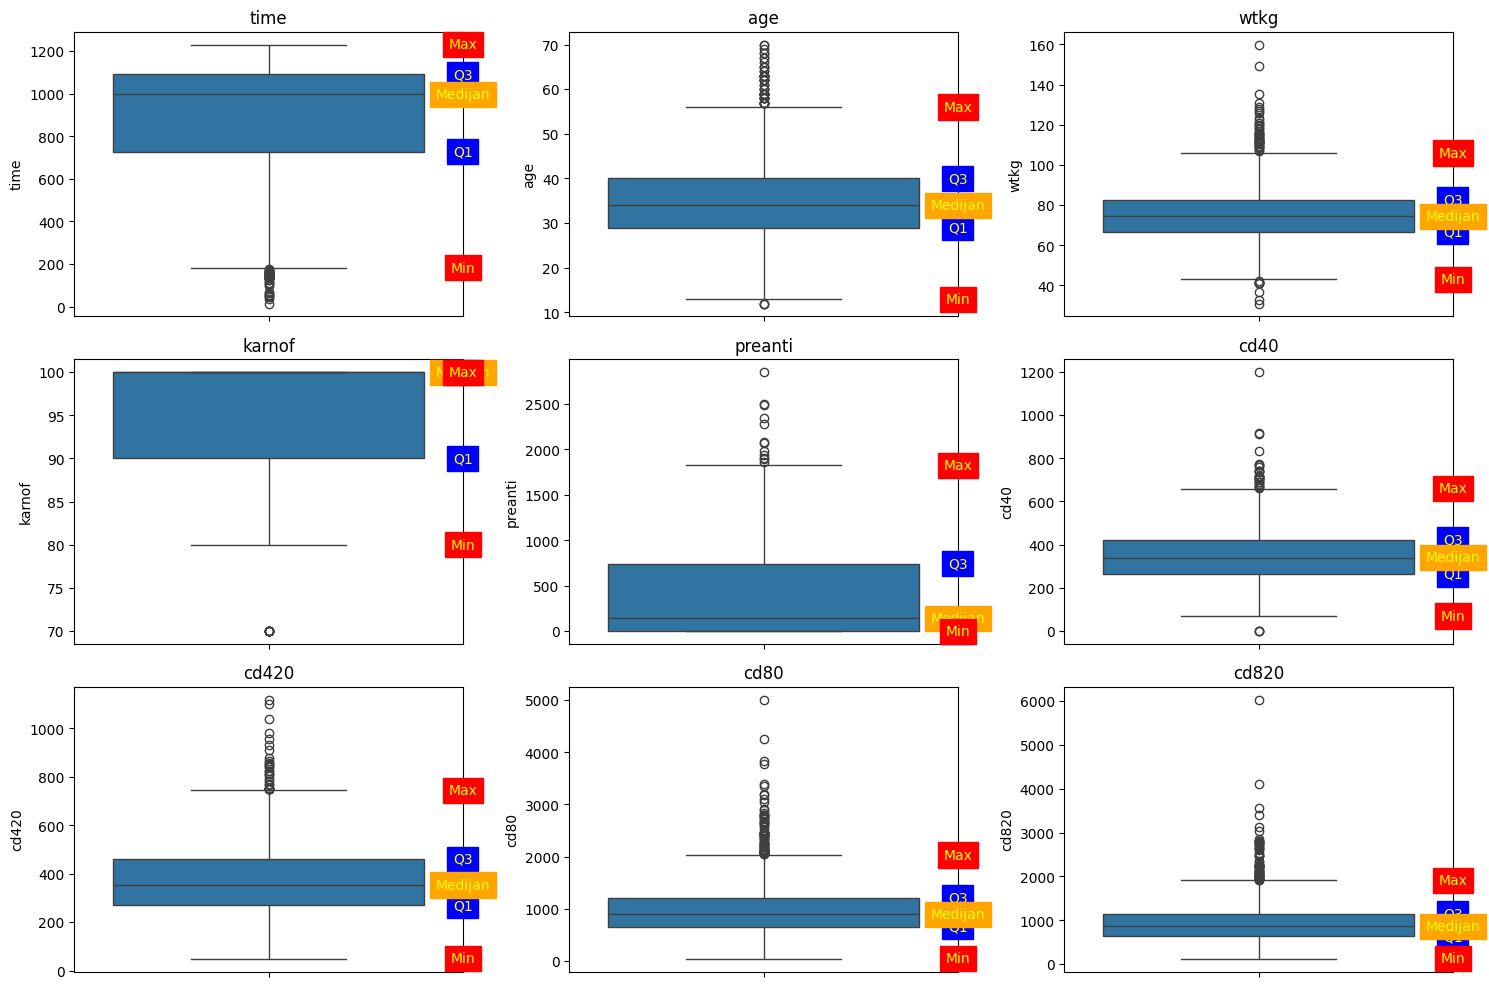

In [11]:
plt.figure(figsize=(15, 10))

# Kreiranje boxplotova i prikazivanje ekstrema
for i, var in enumerate(continuous_vars, 1):
    ax = plt.subplot(3, 3, i)
    sns.boxplot(y=ct[var])
    plt.title(var)

    # Kalkulacija kvartila, gornje i donje granice prema IQR
    Q1 = ct[var].quantile(0.25)
    Q3 = ct[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Pronalazak ekstrema
    below_lower_bound = ct[ct[var] < lower_bound]
    above_upper_bound = ct[ct[var] > upper_bound]
    outliers = pd.concat([below_lower_bound, above_upper_bound])

    # Definiranje min. i max. vrijednosti
    min_val = ct[ct[var] >= lower_bound][var].min()
    max_val = ct[ct[var] <= upper_bound][var].max()

    # Anotacijene na grafu
    ax.text(x=0.5, y=Q1, s="Q1", color='yellow', va='center', ha='center', backgroundcolor='blue')
    ax.text(x=0.5, y=Q3, s="Q3", color='yellow', va='center', ha='center', backgroundcolor='blue')
    ax.text(x=0.5, y=ct[var].median(), s="Medijan", color='yellow', va='center', ha='center', backgroundcolor='orange')
    ax.text(x=0.5, y=min_val, s="Min", color='yellow', va='center', ha='center', backgroundcolor='red')
    ax.text(x=0.5, y=max_val, s="Max", color='yellow', va='center', ha='center', backgroundcolor='red')

    # Ispis ekstrema prema donjoj i gornjoj granici i u postotku
    percent_below = (len(below_lower_bound) / total_count) * 100
    percent_above = (len(above_upper_bound) / total_count) * 100
    total_percent_outliers = (len(outliers) / total_count) * 100

    print(f"Varijabla {var}:")
    print(f"  Broj ekstrema ispod donje granice: {len(below_lower_bound)} ({percent_below:.2f}%)")
    print(f"  Broj ekstrema iznad gornje granice: {len(above_upper_bound)} ({percent_above:.2f}%)")
    print(f"  Ukupan broj ekstrema: {len(outliers)} ({total_percent_outliers:.2f}%)\n")

plt.tight_layout()
plt.show()


#### Komentar na rezultate grafa i izračuna

Za varijable age (dob), wtkg (težina), preanti, cd40, cd420, cd80, i cd820, većina ekstremnih vrijednosti se nalazi iznad gornje granice.

Varijable poput "time" i "karnof", postoji mali broj ekstremnih vrijednosti, ali svi su koncentrirani ispod donje granice, što sugerira da postoji mali broj pacijenata s izuzetno niskim vremenom do neuspjeha ili s niskim Karnofsky ocjenama. 

Za druge varijable poput "age", "wtkg", i "preanti", ekstremne vrijednosti su prisutne iznad gornje granice, što može ukazivati na to da postoji manji broj pacijenata koji su stariji, teži ili s dužom poviješću prethodne terapije nego što je to uobičajeno.

U varijablama "cd40", "cd420", "cd80" i "cd820", koje mjere broj CD4 (bijelih krvnih stanica) i CD8 (T stanice) stanica, prisutne su ekstremne vrijednosti samo iznad gornje granice.

Također treba istaknuti da ukupni postotak ekstrema nije posebno visok za većinu varijabli, ukazuje na to da podaci generalno pokazuju prilično stabilnu distribuciju bez izrazitih anomalija. Najveći postotak ekstrema zabilježen je za varijablu cd80 s 3.32%, što je relativno umjereno.

### 1.3.2 Identifikacija Uniformnih ili Nelogičnih Distribucija za KATEGORIČE varijable

Opis kategoričkih varijabla: <br>
trt - treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only) <br>
hemo - hemophilia (0=no, 1=yes) <br>
homo - homosexual activity (0=no, 1=yes) <br>
drugs - history of IV drug use (0=no, 1=yes) <br>
oprior - Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes) <br>
z30 - ZDV in the 30 days prior to 175 (0=no, 1=yes) <br>
zprior - ZDV prior to 175 (0=no, 1=yes) <br>
race- race (0=White, 1=non-white) <br>
gender - gender (0 = Female, 1= Male) <br>
str2 - antiretroviral history (0=naive, 1=experienced) <br>
strat - antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks) <br>
symptom - symptomatic indicator (0=asymp, 1=symp) <br>
treat - treatment indicator (0=ZDV only, 1=others) <br>
offtrt - indicator of off-trt before 96+/-5 weeks (0=no,1=yes) <br>
cd40 - CD4 at baseline <br>
cd420 - CD4 at 20+/-5 weeks <br>
cd80 - CD8 at baseline <br>
cd820 - CD8 at 20+/-5 weeks <br>
cid - censoring indicator (1 = failure, 0 = censoring)<br>

### 1.3.2.1 Frekvencijska distribucija kategoričkih varijabli
Za kategoričke varijable koristit ćemo frekvencijsku analizu kako bismo utvrdili postoji li uniformna i nelogična distribucija vrijednosti.

In [12]:
categorical_vars = {
    'trt': {0: 'ZDV only', 1: 'ZDV + ddI', 2: 'ZDV + Zal', 3: 'ddI only'},
    'hemo': {0: 'no', 1: 'yes'},
    'homo': {0: 'no', 1: 'yes'},
    'drugs': {0: 'no', 1: 'yes'},
    'oprior': {0: 'no', 1: 'yes'},
    'z30': {0: 'no', 1: 'yes'},
    'zprior': {0: 'no', 1: 'yes'},
    'race': {0: 'White', 1: 'non-white'},
    'gender': {0: 'Female', 1: 'Male'},
    'str2': {0: 'naive', 1: 'experienced'},
    'strat': {1: 'Antiretroviral Naive', 2: '> 1 but <= 52 weeks of prior antiretroviral therapy', 3: '> 52 weeks'},
    'symptom': {0: 'asymp', 1: 'symp'},
    'treat': {0: 'ZDV only', 1: 'others'},
    'offtrt': {0: 'no', 1: 'yes'},
    'cid': {0: 'censoring', 1: 'failure'}
}

all_freq_data = pd.DataFrame()
for var, mapping in categorical_vars.items():
    # Mapiranje vrijednosti na opisne labele
    mapped_var = ct[var].map(lambda x: f"{x} - {mapping.get(x, 'Unknown')}")
    counts = mapped_var.value_counts()
    norm_counts = mapped_var.value_counts(normalize=True)
    combined = pd.concat([counts, norm_counts], axis=1, keys=['Pojavnost', 'Normalizacija'])
    
    # dodavanje stupca ime varijable
    combined['Ime varijable'] = var
    
    # Dodavanje u dataset za sve frekvencijske podatke
    all_freq_data = pd.concat([all_freq_data, combined])
    
    # ispisujemo na ekran podatke
    print(f"Frekvencija za varijablu {var}:")
    print(combined)
    print("\n")  # Dodaje prazan red za bolju čitljivost
    
# Resetiranje indeksa za pretvaranje oznaka varijabli u stupac
all_freq_data.reset_index(inplace=True)
all_freq_data.rename(columns={'index': 'Vrijednost varijable'}, inplace=True)

Frekvencija za varijablu trt:
               Pojavnost  Normalizacija Ime varijable
trt                                                  
3 - ddI only         561       0.262272           trt
0 - ZDV only         532       0.248714           trt
2 - ZDV + Zal        524       0.244974           trt
1 - ZDV + ddI        522       0.244039           trt


Frekvencija za varijablu hemo:
         Pojavnost  Normalizacija Ime varijable
hemo                                           
0 - no        1959       0.915849          hemo
1 - yes        180       0.084151          hemo


Frekvencija za varijablu homo:
         Pojavnost  Normalizacija Ime varijable
homo                                           
1 - yes       1414       0.661057          homo
0 - no         725       0.338943          homo


Frekvencija za varijablu drugs:
         Pojavnost  Normalizacija Ime varijable
drugs                                          
0 - no        1858        0.86863         drugs
1 - yes        281

#### Komentar na rezultate frekvencijske distribucije kategoričkih varijabli.

Vidi se raznovrsnost u skupu podataka, ali nisu identificirane značajne nelogičnosti u distribuciji.<br>

Uniformna distribucija kod varijable "trt" upućuje na pažljivo planiran dizajn studije, dok druge varijable kao što su "hemo", "homo" i "drugs" upućuju na očekivane obrasce.

Varijable poput "race" i "gender" pokazuju neravnomjernu distribuciju, što nije neuobičajeno u kliničkim studijama, ali treba biti oprezan pri generalizaciji rezultata. U cjelini, nisu uočeni značajni pokazatelji nelogičnih distribucija koji bi upućivali na greške ili pristranost u skupu podataka.

### 1.4 Provjeriti/redizajnirati/odrediti ciljnu varijablu i njenu kvalitetu

#### 1.4.1 Određivanje cilje varijable

Ciljna varijabla koju sam razmotrio jest binominalna varijabla 'cid', koja služi kao oznaka između pacijenata koji su doživjeli "failure" (primjerice, smrt ili značajno pogoršanje zdravstvenog stanja) i onih čija su se promatranja završila cenzuriranjem. 

Cenzuriranje u ovom slučaju označava situacije kada su podaci nepotpuni iz razloga kao što su gubitak kontakta s pacijentom tijekom praćenja ili završetak studije prije nego što se dogodio relevantan ishod, što može biti posljedica preseljenja pacijenata ili njihove odluke da više ne sudjeluju u terapiji.

In [13]:
# Kreiranje frekvencijske tablice za cid varijablu s udiom podataka
cid_frequency = ct['cid'].value_counts().to_frame(name='Pojavnost')
cid_frequency['%'] = ct['cid'].value_counts(normalize=True)
cid_frequency['Ime varijable'] = 'cid'

# Preimenovanje indeksa za ljepši ispis
cid_frequency.index = ['0 - censoring', '1 - failure']

cid_frequency

,Pojavnost,%,Ime varijable
0 - censoring,1618,0.756428,cid
1 - failure,521,0.243572,cid


Frekvencijska tablica za varijablu 'cid' pokazuje distribuciju ishoda među pacijentima, gdje veći dio podataka pripada cenzuriranim slučajevima (75%). Ovo je tipično za klinička ispitivanja, gdje mnogi subjekti napuste studiju ili ne dožive ishod događaja tijekom praćenog perioda.

#### 1.4.2 Kvaliteta ciljena variajble

Kvalitetu ciljne vraijable je bitna za bilo koju statističku analizu, a može se procijeniti u sljedećim koracima:

##### 1.4.2.1 Provjera dosljednosti podataka

Već smo vidjeli da su podaci dosljedni i da nema pogrešaka u unosu, kao što su nemoguće vrijednosti ili krivi unos podataka (tipfeler).

##### 1.4.2.2 Provjera nedostajućih vrijednosti

Inicijalni dataset nije imao nedostajuće vrijednosti.

##### 1.4.2.3 Balasiranost

Postoji 75.64% cenzuriranih i 24.36% neuspjeha, što ukazuje na neravnotežu. Ovo nije nužno pokazatelj loše kvalitete, ali može utjecati na performanse nekih modela predviđanja, osobito onih koji pretpostavljaju balansiranu distribuciju.

## 2. Statističke analize uzorka podataka

### 2.1 Za svaku kategoričku varijablu prikazati distribuciju frekvencije u grafu

Graf frekvencijske distribucije kategoričkih varijabli.

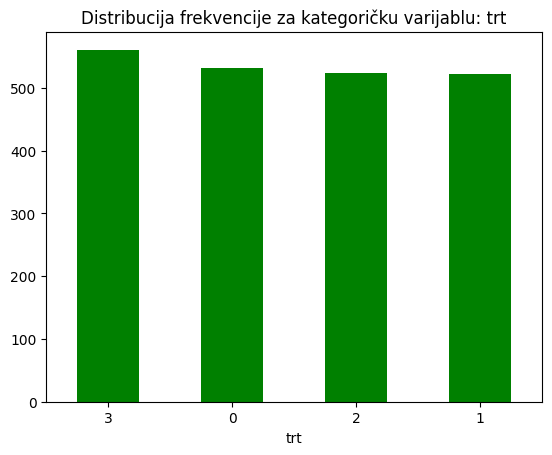

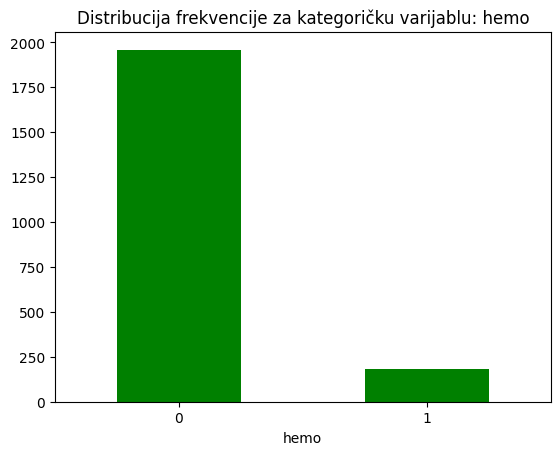

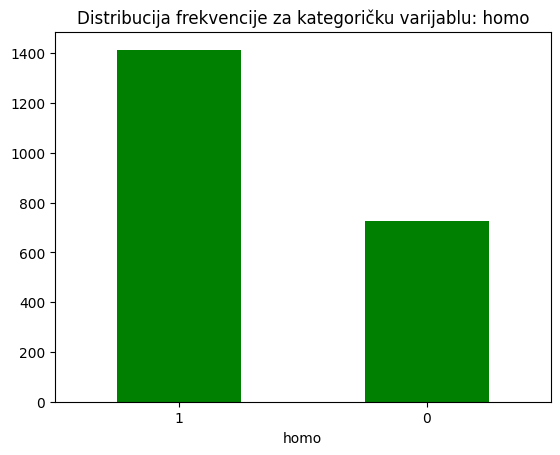

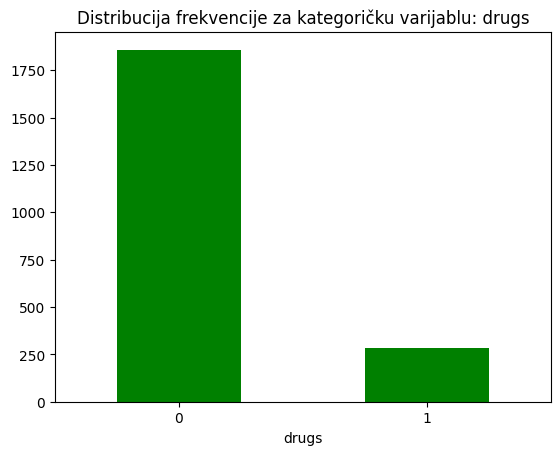

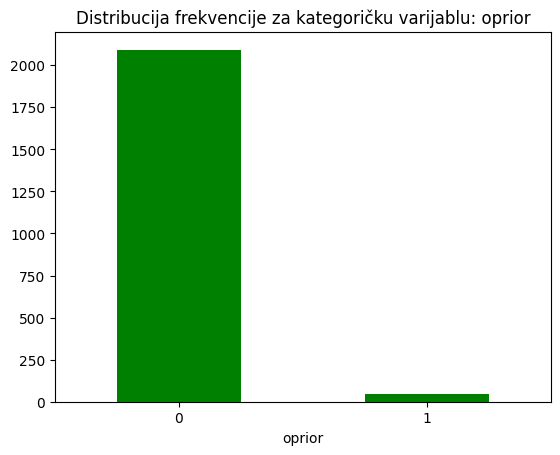

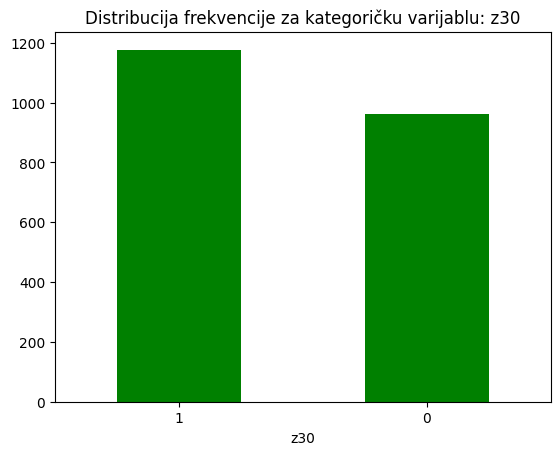

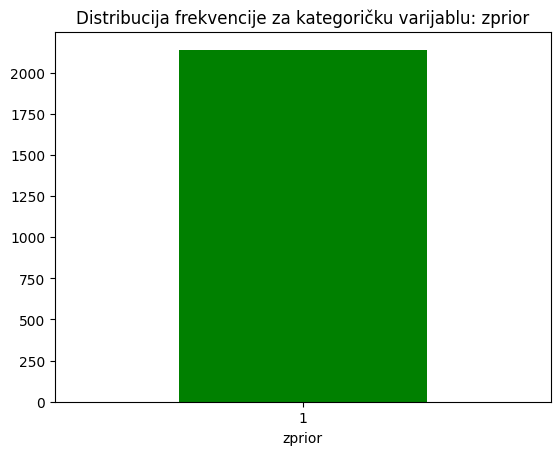

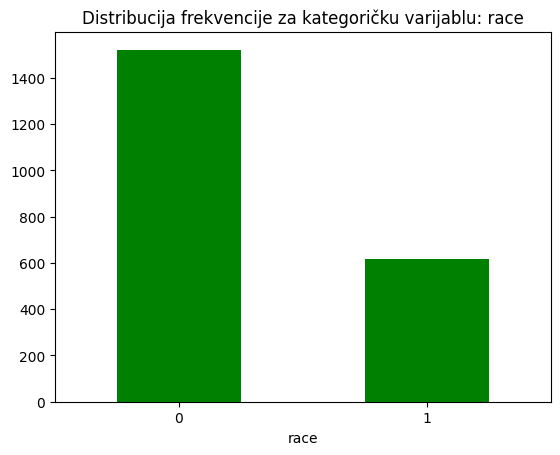

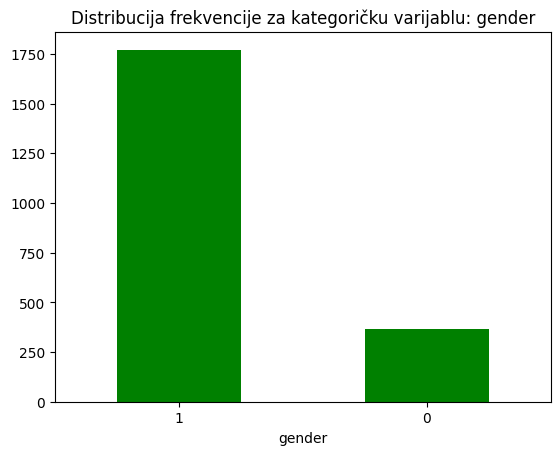

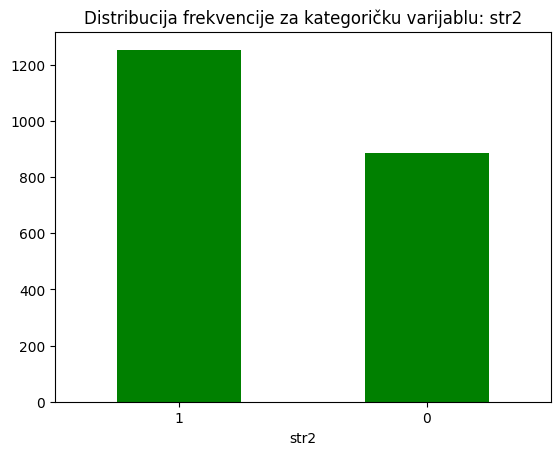

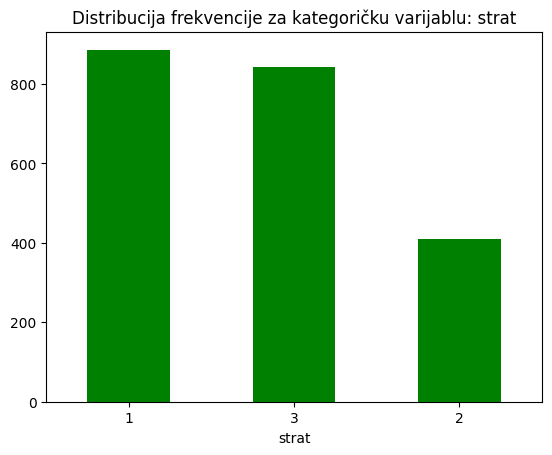

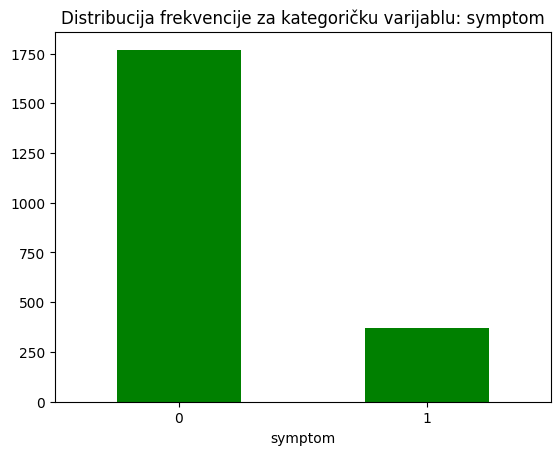

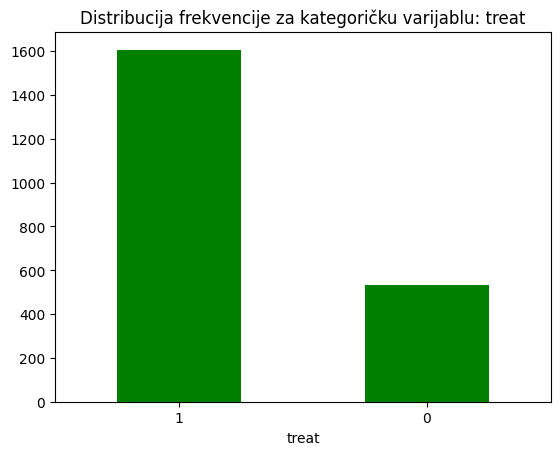

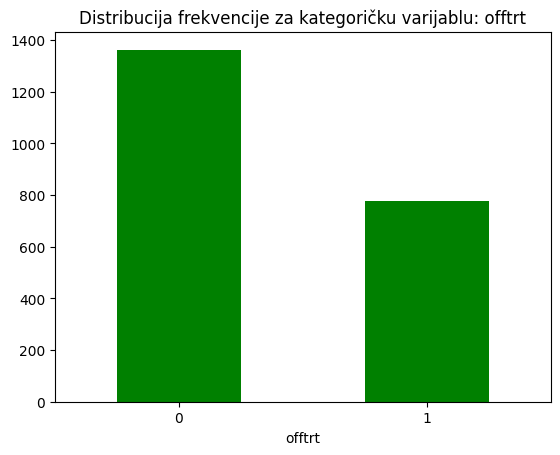

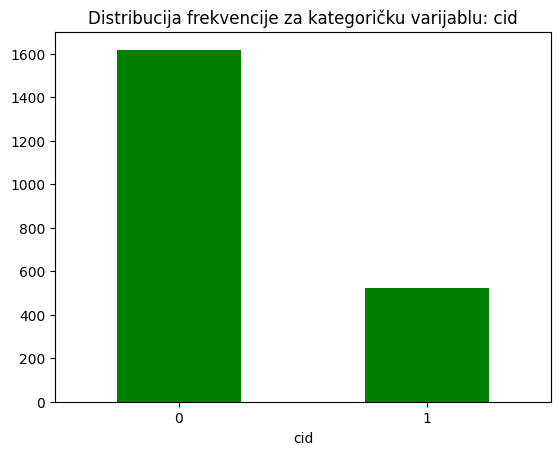

In [14]:
for var in categorical_vars:
    plt.figure()
    ct[var].value_counts().plot(kind='bar', color='green')
    plt.title(f"Distribucija frekvencije za kategoričku varijablu: {var}")
    plt.xticks(rotation=0)  
    plt.show()

#### 2.2 Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

Skewness (asimetričnost) i Kurtosis (spljoštenost) su statističke mjere koje opisuju oblik distribucije podataka.

#### Skewness
Skewness mjeri stupanj asimetrije distribucije podataka oko svoje srednje vrijednosti. Distribucija može biti:

Pozitivno skewed (desno skewed): Veći broj promatranja skuplja se na nižem kraju skale, dok je rep distribucije usmjeren prema većim vrijednostima. Srednja vrijednost je veća od medijana.<br>

Negativno skewed (lijevo skewed): Veći broj promatranja skuplja se na višem kraju skale, dok je rep distribucije usmjeren prema nižim vrijednostima. Srednja vrijednost je manja od medijana.<br>

Simetrična distribucija ima skewness blizu nule, što znači da su podaci jednako raspoređeni oko srednje vrijednosti, poput normalne distribucije.<br>

#### Kurtosis
Kurtosis opisuje "šiljatost" ili "spljoštenost" distribucije u odnosu na normalnu distribuciju (koja ima kurtosis jednak 3). Postoje tri tipa:

Leptokurtična distribucija (kurtosis > 3): Distribucija ima oštriji vrh i deblje repove u odnosu na normalnu distribuciju, što ukazuje na veći broj ekstremnih vrijednosti.

Platikurtična distribucija (kurtosis < 3): Distribucija je spljoštenija od normalne distribucije s tanjim repovima, što ukazuje na manji broj ekstremnih vrijednosti.

Mesokurtična distribucija (kurtosis ≈ 3): Distribucija ima sličan oblik kao normalna distribucija.


#### Z-vrijednost
Z-vrijednost, ili standardizirani rezultat, je statistička mjera koja opisuje položaj pojedinačne vrijednosti unutar distribucije u odnosu na srednju vrijednost i standardnu devijaciju te distribucije. Z-vrijednost se izračunava pomoću formule:
Z = (X - μ) / σ

gdje je:<br>
X - pojedinačna vrijednost <br>
μ - srednja vrijednost skupa podataka <br>
σ - standardna devijacija <br>

Z-vrijednost pokazuje koliko standardnih devijacija pojedinačna vrijednost odstupa od srednje vrijednosti:<br>

Z-vrijednost = 0 znači da je vrijednost jednaka srednjoj vrijednosti.<br>
Pozitivna Z-vrijednost znači da je vrijednost iznad srednje vrijednosti.<br>
Negativna Z-vrijednost znači da je vrijednost ispod srednje vrijednosti.<br>

In [15]:
# Izračunavanje osnovnih statistika, nagnutosti i zaobljenosti za filtrirane kontinuirane varijable
basic_stats_loaded = ct[continuous_vars].describe()
skewness_loaded = ct[continuous_vars].skew()
kurtosis_loaded = ct[continuous_vars].kurtosis()

# Dodavanje nagnutosti i zaobljenosti kao nove redove
additional_stats_loaded = pd.DataFrame({'Skewness': skewness_loaded, 'Kurtosis': kurtosis_loaded}).transpose()
combined_stats_loaded = pd.concat([basic_stats_loaded, additional_stats_loaded])

# Filtriranje da se zadrže samo redovi za sred. vrijd., skewness i kurtosis
filtered_stats_loaded = combined_stats_loaded.loc[['mean', 'Skewness', 'Kurtosis']]

# Prikaz prve tablice
print("Prikaz srednje vrijednost,zaobljenost distribucije i nagnutost distribucije")
display(filtered_stats_loaded)

# Izračunavanje z-vrijednosti za svaku kontinuiranu varijablu
means = ct[continuous_vars].mean()
std_devs = ct[continuous_vars].std()
z_scores = (ct[continuous_vars] - means) / std_devs

# Prikaz z-vrijednosti za prvih n redaka za kontinuirane varijable
print("Prikaz z-vrijednosti po pacijentima")
display(z_scores.head())


Prikaz srednje vrijednost,zaobljenost distribucije i nagnutost distribucije


,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
mean,879.098177,35.248247,75.125311,95.446470,379.175783,350.501169,371.307153,986.627396,935.369799
Skewness,-1.121708,0.642472,0.706486,-1.027621,1.191375,0.757868,0.730347,1.733736,2.091427
Kurtosis,0.026238,0.977685,2.229040,0.695074,0.939290,1.805411,1.071055,6.178981,11.770810


Prikaz z-vrijednosti po pacijentima


,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
0,0.235744,1.464200,1.107390,0.771656,-0.809068,0.602990,0.730756,-0.875946,-1.373939
1,0.420502,2.956904,-1.936409,-0.922977,1.100642,-1.589736,-1.059960,-1.238297,-0.834584
2,0.280222,1.119729,1.004790,-0.922977,0.699496,-0.206632,-0.672778,2.241519,2.152094
3,0.981618,1.349376,0.765390,0.771656,2.176054,-0.535541,0.156897,1.256509,0.068836
4,0.721589,0.890083,-0.636810,0.771656,2.075768,1.294542,-0.126575,-0.242874,-0.344670


#### Komentar na rezultate

Visoke vrijednosti nagnutosti skewnessa kod nekih varijabli kao što su preanti, cd40, cd80, i cd820 ukazuju na asimetričnu distribuciju, gdje je veći broj vrijednosti koncentriran na jednom kraju spektra.

Izuzetno visoki kurtosis za cd820 sugerira da postoji mnogo više ekstrema u odnosu na normalnu distribuciju. To može ukazivati na velike varijacije u broju CD8 stanica među pacijentima.

Praćenje z-vrijednosti pomaže u identifikaciji individualnih karakteristika pacijenata koje mogu zahtijevati posebnu pažnju ili prilagodbu tretmana.<br>

Prikazali smo z-vrijednost za 5 pacijenata.<br>

Prvi red: Primjetno je da pacijent ima visoku vrijednost age i wtkg, što bi moglo ukazivati na starijeg pacijenta s većom težinom.<br>
Drugi red: Negativna z-vrijednost za wtkg sugerira da je pacijent značajno lakši od prosječne težine u studiji.<br>
Treći red: Pozitivne z-vrijednosti za cd80 i cd820 ukazuju na visoke brojeve CD8 stanica.



#### Vizualni prikaz z-vrijednost 

Svaku kontinuiranu varijablu iz dataseta ćemo vizualno prikazati za prvog pacijenta. Uz to, prikazat ćemo i izračunate z-vrijednosti te dodatno izračunati dva postotka za svaku varijablu:

Postotak pacijenata koji imaju manju vrijednost varijable od promatrane vrijednosti kod prvog pacijenta.<br>
Postotak pacijenata koji imaju veću vrijednost varijable od promatrane vrijednosti kod prvog pacijenta.<br>

Ovo će nam omogućiti dublji uvid u to kako vrijednosti prvog pacijenta stoje u usporedbi s ostalim pacijentima u datasetu.

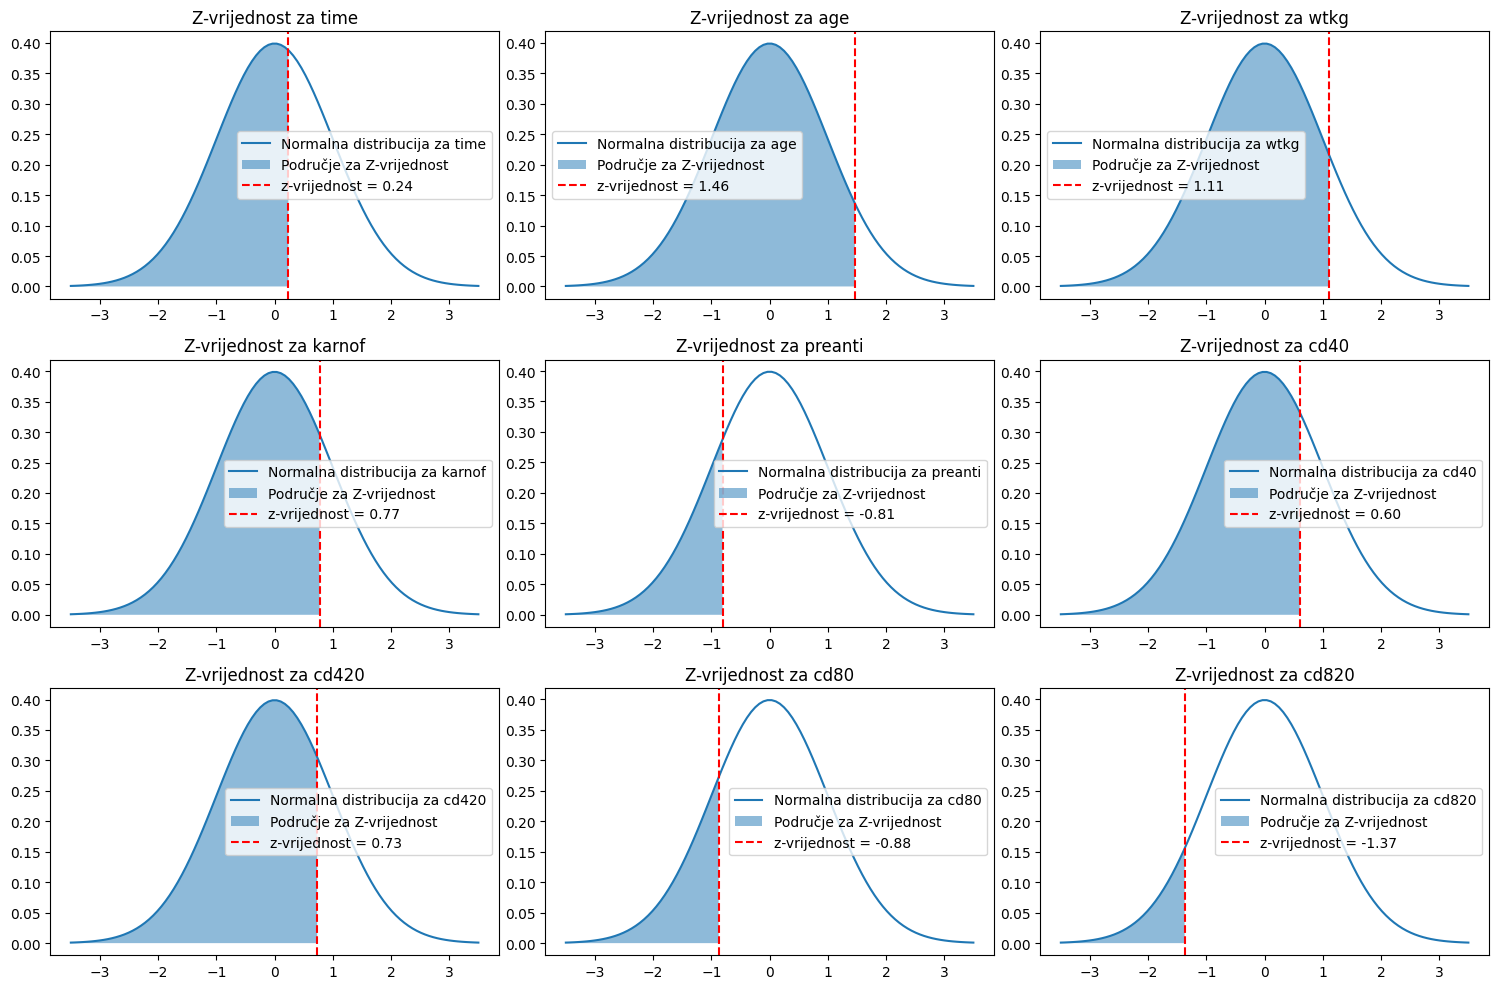

In [16]:
# Z-vrijednosti za prvog pacijenta za svaku varijablu
z_values_first_patient = {
    'time': 0.235744,
    'age': 1.464200,
    'wtkg': 1.107390,
    'karnof': 0.771656,
    'preanti': -0.809068,
    'cd40': 0.602990,
    'cd420': 0.730756,
    'cd80': -0.875946,
    'cd820': -1.373939
}

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Prikazujemo normalnu distribucijsku krivulju za svaku z-vrijednost
for i, (variable, z_value) in enumerate(z_values_first_patient.items()):
    # Definiranje raspona za x os
    x = np.linspace(-3.5, 3.5, 100)
    # Izračunavanje normalne distribucijske krivulje
    y = stats.norm.pdf(x)

    # Prikaz krivulje
    axes[i].plot(x, y, label=f'Normalna distribucija za {variable}')
    
    # Osjenčavanje područja ispod krivulje za z-vrijednost
    shade = np.linspace(-3.5, z_value, 300)
    axes[i].fill_between(shade, stats.norm.pdf(shade), alpha=0.5, label=f'Područje za Z-vrijednost')
    
    # Označavanje z-vrijednosti
    axes[i].axvline(z_value, color='red', linestyle='--', label=f'z-vrijednost = {z_value:.2f}')
    axes[i].set_title(f'Z-vrijednost za {variable}')
    axes[i].legend()

plt.tight_layout()
plt.show()



In [17]:
# Vrijednosti za prvog pacijenta
real_values_first_patient = ct.iloc[0][continuous_vars]

# Z-vrijednosti za prvog pacijenta
z_values_first_patient = z_scores.iloc[0]

# Računanje i ispis postotaka s dodatnim informacijama
for var in continuous_vars:
    real_value = real_values_first_patient[var]  # Vrijednost varijable
    z_value = z_values_first_patient[var]  # Z-vrijednost varijable
    
    pct_below = norm.cdf(z_value) * 100  # Postotak pacijenata s manjom vrijednošću
    pct_above = (1 - norm.cdf(z_value)) * 100  # Postotak pacijenata s većom vrijednošću
    
    print(f"{var}:")
    print(f"  Vrijednost {var}: {real_value:.2f}")
    print(f"  Z-vrijednost: {z_value:.2f}")
    print(f"  Postotak pacijenata s manjom vrijednošću: {pct_below:.2f}%")
    print(f"  Postotak pacijenata s većom vrijednošću: {pct_above:.2f}%\n")


time:
  Vrijednost time: 948.00
  Z-vrijednost: 0.24
  Postotak pacijenata s manjom vrijednošću: 59.32%
  Postotak pacijenata s većom vrijednošću: 40.68%

age:
  Vrijednost age: 48.00
  Z-vrijednost: 1.46
  Postotak pacijenata s manjom vrijednošću: 92.84%
  Postotak pacijenata s većom vrijednošću: 7.16%

wtkg:
  Vrijednost wtkg: 89.81
  Z-vrijednost: 1.11
  Postotak pacijenata s manjom vrijednošću: 86.59%
  Postotak pacijenata s većom vrijednošću: 13.41%

karnof:
  Vrijednost karnof: 100.00
  Z-vrijednost: 0.77
  Postotak pacijenata s manjom vrijednošću: 77.98%
  Postotak pacijenata s većom vrijednošću: 22.02%

preanti:
  Vrijednost preanti: 0.00
  Z-vrijednost: -0.81
  Postotak pacijenata s manjom vrijednošću: 20.92%
  Postotak pacijenata s većom vrijednošću: 79.08%

cd40:
  Vrijednost cd40: 422.00
  Z-vrijednost: 0.60
  Postotak pacijenata s manjom vrijednošću: 72.67%
  Postotak pacijenata s većom vrijednošću: 27.33%

cd420:
  Vrijednost cd420: 477.00
  Z-vrijednost: 0.73
  Postotak 

#### Komentar na rezultate

Grafovi prikazuju normalnu distribuciju za svaku kontinuiranu varijablu sa specifičnim z-vrijednostima za prvog promatranog pacijenta. 

Svaki graf sadrži:<br>
Plavu punu krivulju koja prikazuje teoretsku normalnu distribuciju za varijablu.
Vertikalnu crvenu isprekidana liniju koja označava z-vrijednost prve promatrana pacijenta.
Sjenčani dio ispod krivulje do crvene linije koji prikazuje postotak pacijenata s manjom vrijednošću od prvog promatranog pacijenta za tu varijablu.<br>

#### 2.3 Izračunati korelacije svake varijable sa ciljnom varijablom

#### 2.3.1 Izračun KATEGORIČKIH varijabli s ciljnom varijablom

#### Chi-kvadrat test 

Chi-kvadrat test se koristi za određivanje postoji li statistički značajna povezanost između dviju kategoričkih varijabli.
U kontekstu analize kategoričkih varijabli u odnosu na ciljnu varijablu, Chi-kvadrat test može pokazati da li razlike u distribucijama frekvencija različitih kategorija jedne varijable variraju u zavisnosti od kategorija ciljne varijable.

U Chi-kvadrat testu, Chi-kvadrat statistika (Chi2 Statistic) mjeri razliku između stvarnih opaženih vrijednosti i očekivanih vrijednosti za kategoričke varijable. Očekivane vrijednosti se temelje na prethodnim pretpostavkama ili hipotezama o distribuciji varijabli. Što je veća vrijednost Chi-kvadrat statistike, to je veća razlika između stvarnih i očekivanih vrijednosti.

P-vrijednost (p-value) u Chi-kvadrat testu pruža informaciju o statističkoj značajnosti rezultata. Niža p-vrijednost ukazuje na veću statističku značajnost rezultata. Uobičajena granica statističke značajnosti je p-vrijednost manja od 0.05, što znači da postoji manje od 5% vjerojatnosti da su promatrani rezultati rezultat slučajnosti.

Chi-kvadrat statistika procjenjuje razliku između stvarnih i očekivanih vrijednosti, dok p-vrijednost ocjenjuje statističku značajnost te razlike. Ako je p-vrijednost manja od odabrane granice (najčešće 0.05), rezultati se smatraju statistički značajnima.


In [18]:
categorical_vars = ['trt','hemo','homo','race','gender','str2','strat','symptom',
                         'treat','offtrt']

chi2_results_corrected = []

for var in categorical_vars:
    contingency_table = pd.crosstab(ct[var], ct['cid'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    # Dodajemo rezultate u listu kao dictionary za svaku varijablu
    chi2_results_corrected.append({'Variable': var, 'Chi2 Statistic': chi2, 'p-value': p_value})

# Kreiramo DataFrame iz liste rezultata
results_df = pd.DataFrame(chi2_results_corrected)

# Postavljamo format prikaza za numeričke vrijednosti
styled_results = results_df.style.format({'Chi2 Statistic': "{:.4f}", 'p-value': "{:.4f}"})

# Stilovi
styled_results = styled_results.background_gradient(subset=['Chi2 Statistic', 'p-value'], cmap='viridis')\
                               .set_properties(**{'text-align': 'left'})\
                               .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
                               .set_caption("Chi-square Test Results")
display(styled_results)


,Variable,Chi2 Statistic,p-value
0,trt,37.3544,0.0000
1,hemo,0.1807,0.6707
2,homo,6.0375,0.0140
3,race,6.4175,0.0113
4,gender,4.0802,0.0434
5,str2,31.9855,0.0000
6,strat,37.0675,0.0000
7,symptom,34.9326,0.0000
8,treat,35.2097,0.0000
9,offtrt,17.9936,0.0000


#### Komentar na rezultate
Rezultati Chi-kvadrat testa pokazuju da visoke vrijednosti Chi-kvadrat statistike uz vrlo niske p-vrijednosti ukazuju na snažnu statističku povezanost između nekoliko varijabli, uključujući vrstu liječenja (trt), strategiju liječenja (str2 i strat), simptome (symptom) i tretman (treat). To sugerira da ovi faktori mogu biti značajni prediktori ishoda liječenja HIV-a.

Međutim, postoje i varijable poput razine hemoglobina (hemo) koje nisu pokazale statistički značajnu povezanost s ishodom liječenja, što sugerira manji utjecaj tih faktora na ishod.


#### 2.3.2 Izračun KONTINUIRANIH varijabli s ciljnom varijablom

#### Pearsovova korelacija

Pearsonova korelacija između 'cid' i kontinuiranih varijabli:
cid        1.000000
time      -0.574989
age        0.070384
wtkg       0.016205
karnof    -0.102944
preanti    0.128453
cd40      -0.185647
cd420     -0.345908
cd80       0.065338
cd820      0.019494
Name: cid, dtype: float64


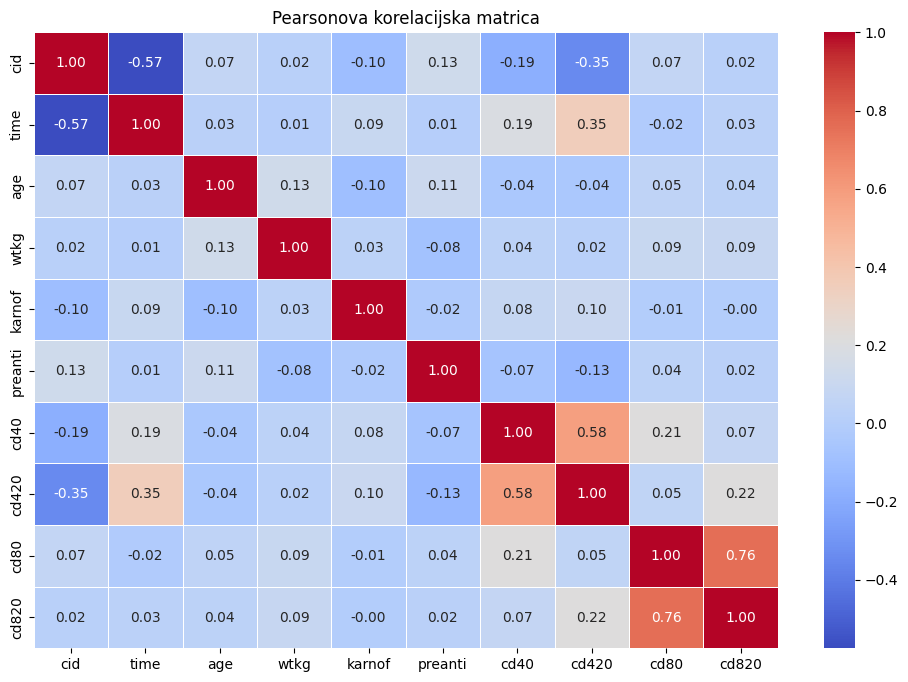

In [19]:
# Izračunavanje Pearsonove korelacije za sve kontinuirane varijable i 'cid'
pearson_corr = ct[['cid'] + continuous_vars].corr()

# Prikaz Pearsonove korelacije između 'cid' i ostalih kontinuiranih varijabli
print("Pearsonova korelacija između 'cid' i kontinuiranih varijabli:")
print(pearson_corr['cid'])

# Kreiranje heatmape za vizualizaciju 
plt.figure(figsize=(12, 8))  # Postavljanje veličine 
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearsonova korelacijska matrica')  
plt.show()


#### Komentar na rezultate
Analiza pokazuje da su varijable kao što su vrijeme trajanja terapije (time) i broj CD4 stanica snažno povezane s ishodima liječenja HIV-a. Suprotno tome, varijable poput dobi i težine pokazale su slabiju korelaciju s ishodima, ukazujući na manji izravni utjecaj na dugoročne rezultate liječenja. 

'time', 'cd40', 'cd420' i 'preanti' pokazuju najznačajniju korelaciju s 'cid', dok 'age', 'wtkg', 'karnof', 'cd80' i 'cd820' imaju manji ili neznatan utjecaj.

#### 2.4 Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom

Sada ćemo distribuciju vrijednosti prikazati po kategoriziranim Z-vrijednostima za svaku varijablu.

Korelacije kategoriziranih Z-vrijednosti s ciljnom varijablom:
time_z_category            NaN
age_z_category        0.032617
wtkg_z_category      -0.027704
karnof_z_category    -0.030420
preanti_z_category    0.061997
cd40_z_category      -0.023981
cd420_z_category     -0.040352
cd80_z_category       0.032383
cd820_z_category      0.006631
Name: cid, dtype: float64


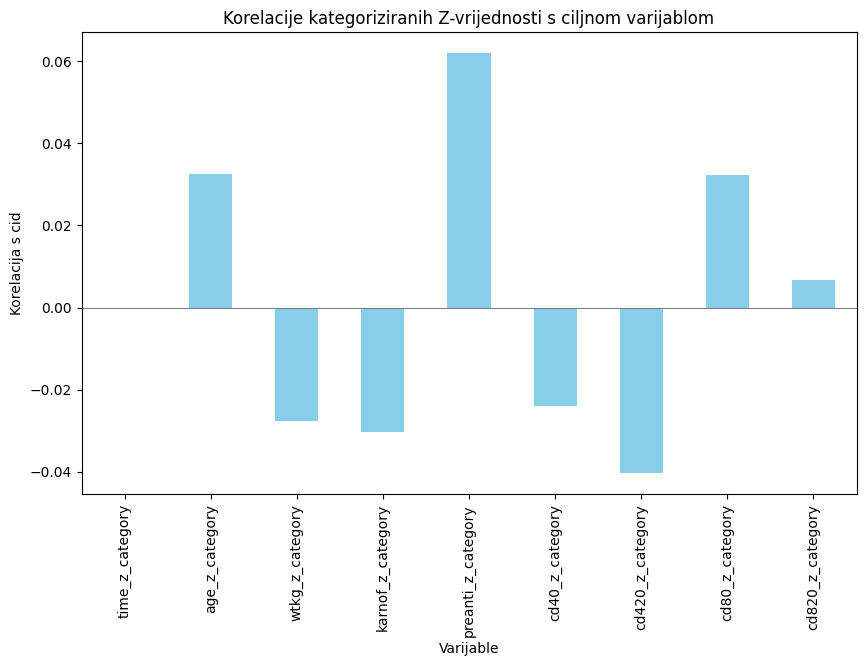

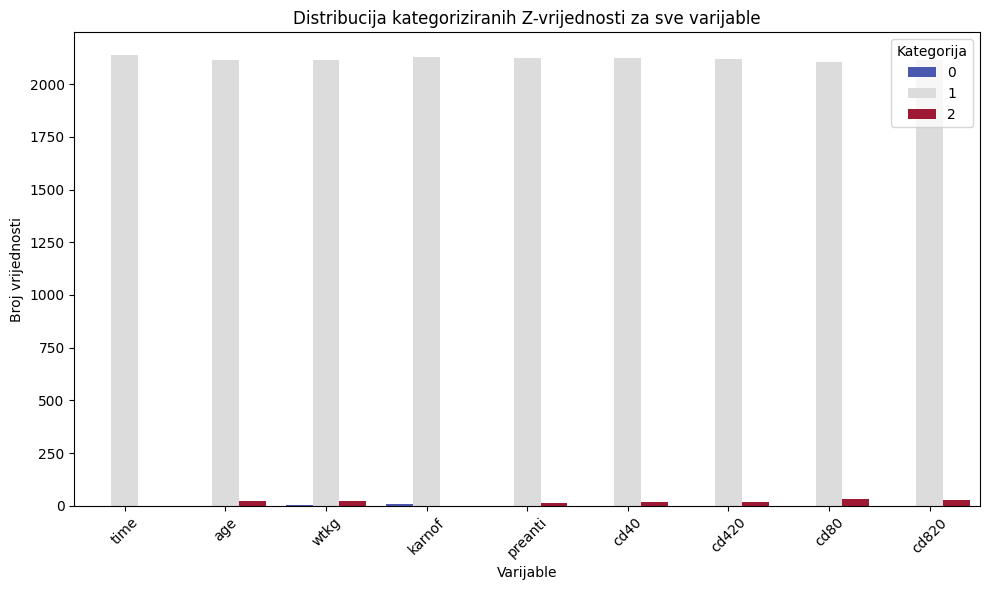

In [20]:
# Izračun Z-vrijednosti za kontinuirane varijable
for var in continuous_vars:
    ct[var + '_z'] = (ct[var] - ct[var].mean()) / ct[var].std()

# Kategorizacija Z-vrijednosti u tri razreda
bins = [-np.inf, -3, 3, np.inf]
labels = [0, 1, 2]  # 0: <-3, 1: (-3 do 3), 2: >3
category_columns = []

for var in continuous_vars:
    z_var = var + '_z'
    cat_var = z_var + '_category'
    ct[cat_var] = pd.cut(ct[z_var], bins=bins, labels=labels)
    category_columns.append(cat_var)

# Izračunavanje korelacije kategoriziranih Z-vrijednosti s ciljnom varijablom cid
correlations = ct[category_columns + ['cid']].corr()['cid'].drop('cid')
print("Korelacije kategoriziranih Z-vrijednosti s ciljnom varijablom:")
print(correlations)

# Excel
correlations.to_excel('z-kategorije.xlsx')

# Vizualizacija
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Korelacije kategoriziranih Z-vrijednosti s ciljnom varijablom')
plt.xlabel('Varijable')
plt.ylabel('Korelacija s cid')
plt.axhline(0, color='grey', linewidth=0.8)  # Linija za y=0 za referencu
plt.show()

# Vizualizacija distribucije kategoriziranih Z-vrijednosti
all_categories = pd.DataFrame()
for var in continuous_vars:
    category_count = ct[var + '_z_category'].value_counts().sort_index()
    category_count = category_count.reindex(labels, fill_value=0)
    category_count = category_count.reset_index()
    category_count.columns = ['Category', 'Count']
    category_count['Variable'] = var
    all_categories = pd.concat([all_categories, category_count], axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Count', hue='Category', data=all_categories, palette='coolwarm')
plt.title('Distribucija kategoriziranih Z-vrijednosti za sve varijable')
plt.xlabel('Varijable')
plt.ylabel('Broj vrijednosti')
plt.legend(title='Kategorija')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Komentar na rezultate

Varijabla "preanti_z_category" ima najjaču pozitivnu korelaciju, dok varijabla "cd420_z_category" ima najjaču negativnu korelaciju s ciljnom varijablom "cid". Ostale varijable pokazuju slabije ili neutralne korelacije s ciljnom varijablom.

Varijabla time_z_category pokazuje NaN i to ću dodatno istražiti.

#### Dodatna provjera za varijablu time_z_category

Varijabla time_z_category ima korelaciju NaN. Napravit ćemo dodatne provjere.

Provjera nedostajućih vrijednosti

In [21]:
print(ct['time_z_category'].isnull().sum())

0


Komentar na rezultat:<br>
Vidimo da nema nedostajućih vrijednosti

Z-vrijednosti za time_z

In [22]:
print(ct['time_z'].describe())


count    2.139000e+03
mean     1.229083e-16
std      1.000000e+00
min     -2.959884e+00
25%     -5.203953e-01
50%      4.033944e-01
75%      7.250101e-01
max      1.204012e+00
Name: time_z, dtype: float64


Komentar na rezultate:<br>
Z-vrijednosti su standardizirane tako da imaju srednju vrijednost 0 i standardno odstupanje 1. Najmanja vrijednost iznosi -2.95, a najveća 1.20, što znači da su sve Z-vrijednosti unutar granica -3 do 3.

In [24]:
# Pretvoriti kategoricku varijablu u numericku
if ct['time_z_category'].dtype.name == 'category':
    ct['time_z_category'] = ct['time_z_category'].cat.codes

# Izračun prosječnih vrijednosti
mean_x = ct['time_z_category'].mean()
mean_y = ct['cid'].mean()
print(f"Prosječna vrijednost time_z_category: {mean_x}")
print(f"Prosječna vrijednost cid: {mean_y}")

# Izračun devijacija
deviation_x = ct['time_z_category'] - mean_x
deviation_y = ct['cid'] - mean_y

# Izračun kovarijance
covariance = np.mean(deviation_x * deviation_y)

# Izračun standardnih devijacija
std_x = ct['time_z_category'].std()
std_y = ct['cid'].std()

# Izračun Pearsonovog koeficijenta korelacije
if std_x > 0 and std_y > 0:
    correlation = covariance / (std_x * std_y)
else:
    correlation = np.nan  # Ovo će biti slučaj u našem primjeru

print("Kovarijanca:", covariance)
print("Standardna devijacija X:", std_x)
print("Standardna devijacija Y:", std_y)
print("Korelacija:", correlation)

Prosječna vrijednost time_z_category: 1.0
Prosječna vrijednost cid: 0.24357176250584386
Kovarijanca: 0.0
Standardna devijacija X: 0.0
Standardna devijacija Y: 0.4293375538459243
Korelacija: nan


Rezultati jasno ukazuju na razlog zašto korelacija za time_z_category iznosi NaN. Z-vrijednosti za "time" su sve unutar granica od -3 do 3, što znači da su sve kategorizirane vrijednosti u srednjoj kategoriji (1). Stoga, nema varijacije u kategoriziranim Z-vrijednostima za "time", što dovodi do NaN korelacije s ciljnom varijablom "cid".


## 3. IV, WoE izračuni

#### 3.1 Izračunati IV, WoE za svaku varijablu

WoE i IV omogućuje detaljan uvid u odnos između nezavisnih varijabli i ciljne varijable. Na temelju ovih rezultata, trebali bismo razmotriti fokusiranje na one varijable koje pokazuju visoke IV vrijednosti za daljnje modeliranje, dok varijable s niskim IV vrijednostima možda neće biti korisne za uključivanje u konačni prediktivni model. Također, analiza WoE može pomoći u interpretaciji kako različite kategorije unutar varijabli utječu na vjerojatnost ishoda, što može informirati odluke o ciljanju ili intervencijama.<br>

Općenito, pozitivni WoE ukazuje na kategoriju koja smanjuje vjerojatnost neuspjeha (cid = 1), dok negativni WoE ukazuje na povećanu vjerojatnost neuspjeha.
Varijable s visokim IV vrijednostima trebaju biti prioritet u modelima predviđanja, jer mogu značajno doprinijeti točnosti modela.

Interpretacija vrijednosti IV:<br>

IV < 0.02: Varijabla nije korisna<br>
0.02 ≤ IV < 0.1: Slaba prediktivna moć.<br>
0.1 ≤ IV < 0.3: Srednja prediktivna moć.<br>
0.3 ≤ IV < 0.5: Jaka prediktivna moć.<br>
IV ≥ 0.5: Super prediktivnost.<br>

In [44]:
def calculate_woe_iv(df, feature, target):
    
    # Kreiranje crosstabulacije za svaku varijablu s ciljnom varijablom
    tab = pd.crosstab(df[feature], df[target], margins=True, margins_name="Total")
    tab.columns = ['Good', 'Bad', 'Total']
    
   

    # Izračun distribucije
    tab['Distribution Good'] = tab['Good'] / tab.loc['Total', 'Good']
    tab['Distribution Bad'] = tab['Bad'] / tab.loc['Total', 'Bad']
    
    # Izračun WoE
    tab['WoE'] = np.log(tab['Distribution Good'] / tab['Distribution Bad'])
    tab['WoE'] = tab['WoE'].replace([np.inf, -np.inf, np.nan], 0)  # Zamjena beskonačnih i NaN vrijednosti s 0
    
    # Izračun IV
    tab['IV'] = (tab['Distribution Good'] - tab['Distribution Bad']) * tab['WoE']
    total_iv = tab['IV'].sum()  # Ukupni IV za varijablu, izuzev 'Total' reda
    
    # Uklanjanje reda i stupca 'Total' prije izračuna i povratka
    tab = tab[tab.index != 'Total']  # Uklanjanje reda 'Total'
    tab.drop('Total', axis=1, inplace=True)  # Uklanjanje stupca 'Total' za čistiji ispis
    
    return total_iv, tab[['Good', 'Bad', 'WoE', 'IV']]

# Binning kontinuiranih varijabli
for var in continuous_vars:
    ct[var + '_bin'] = pd.qcut(ct[var], q=6, duplicates='drop')
    categorical_vars.append(var + '_bin')

# Izračun WoE i IV za sve varijable
iv_values = {}
for var in categorical_vars:
    iv, woe_table = calculate_woe_iv(ct, var, 'cid')
    iv_values[var] = iv
    print(f"WoE and IV for {var}:\n", woe_table)
    print(f"Suma IV: {iv}\n")  # Ispis ukupne sume IV za varijablu


WoE and IV for trt:
      Good  Bad       WoE        IV
trt                               
0     351  181 -0.470907  0.061441
1     419  103  0.269946  0.016538
2     415  109  0.203735  0.009632
3     433  128  0.085511  0.001876
Suma IV: 0.08948684627529739

WoE and IV for hemo:
       Good  Bad       WoE        IV
hemo                               
0     1479  480 -0.007861  0.000057
1      139   41  0.087706  0.000633
Suma IV: 0.0006893892044894919

WoE and IV for homo:
       Good  Bad       WoE        IV
homo                               
0      572  153  0.185505  0.011104
1     1046  368 -0.088550  0.005300
Suma IV: 0.01640408828352418

WoE and IV for race:
       Good  Bad       WoE        IV
race                               
0     1128  394 -0.081346  0.004806
1      490  127  0.217022  0.012822
Suma IV: 0.017627872861511074

WoE and IV for gender:
         Good  Bad       WoE        IV
gender                               
0        294   74  0.246319  0.009772
1       13

In [45]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Variable', 'Suma IV'])
print(iv_df.sort_values(by='Suma IV', ascending=False))  # Sortiranje varijabli prema IV vrijednosti

       Variable   Suma IV
10     time_bin  2.494668
16    cd420_bin  0.786575
15     cd40_bin  0.221618
14  preanti_bin  0.097124
6         strat  0.096056
0           trt  0.089487
5          str2  0.086063
8         treat  0.085222
7       symptom  0.082203
9        offtrt  0.045702
13   karnof_bin  0.045549
12     wtkg_bin  0.027221
17     cd80_bin  0.021220
11      age_bin  0.019585
3          race  0.017628
2          homo  0.016404
4        gender  0.011650
18    cd820_bin  0.008298
1          hemo  0.000689


Super prediktivnost (IV ≥ 0.5) <br>
time_bin: IV = 2.495. Vrijeme do neuspjeha ili cenzuriranja pokazuje izvanrednu prediktivnu snagu, što ukazuje da je to ključan faktor u određivanju ishoda pacijenta.<br>
cd420_bin (0.786575): Promjene u broju CD4 stanica na 20±5 tjedana također pokazuju vrlo snažnu prediktivnu snagu, što ističe važnost imunološkog odgovora kao prediktora ishoda tretmana.<br>
Ove dvije varijable su ključni pokazatelji ishoda pacijenta, sugerirajući da vremenski tijek bolesti i imunološki odgovor igraju presudnu ulogu u određivanju uspjeha terapije.<br>

Srednja prediktivna moć (0.1 - 0.3)<br>
cd40_bin: Broj CD4 stanica na početku studije ukazuje na srednju prediktivnu snagu, što upućuje na važnost početnog imunološkog statusa u procjeni ishoda tretmana.<br>

U ovoj analizi, visok IV za varijablu time_bin izrazito ističe važnost vremenskog perioda do neuspjeha ili cenzuriranja kao ključnog faktora u predviđanju ishoda pacijenata s HIV-om. Srednje vrijednosti IV-a za cd40_bin i cd420_bin ukazuju na to da promjene u broju CD4 stanica tijekom vremena također pružaju važan uvid u stanje i prognozu pacijenata. <br>

Varijable s niskim i vrlo niskim IV-om, poput preanti_bin, strat, trt, str2, treat, symptom, offtrt, karnof_bin, i wtkg_bin i druge, pokazuju umjerenu sposobnost razlikovanja između ishoda. One obuhvaćaju faktore kao što su prethodna izloženost antiretrovirusnim lijekovima, strategije liječenja, vrsta tretmana, prisutnost simptoma, prestanak tretmana, opće zdravstveno stanje pacijenta i tjelesna težina. Ove varijable ukazuju na to da različiti aspekti medicinske povijesti i trenutno fizičko stanje mogu pridonijeti razumijevanju prognoze pacijenata.

cd80_bin, age_bin, race, homo, gender, cd820_bin, i hemo: Ove varijable pokazuju vrlo slabu ili gotovo nikakvu prediktivnu moć. Unatoč njihovom ograničenom doprinosu u razlikovanju ishoda, one su važne za opću demografsku i zdravstvenu sliku pacijenata, ali ne pružaju značajne informacije koje bi mogle utjecati na odluke o tretmanu u kontekstu HIV-a.

#### 3.2 Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable

Prikazat ćemo varijable s IV većim od 0.1.

10     time_bin
16    cd420_bin
15     cd40_bin
Name: Variable, dtype: object


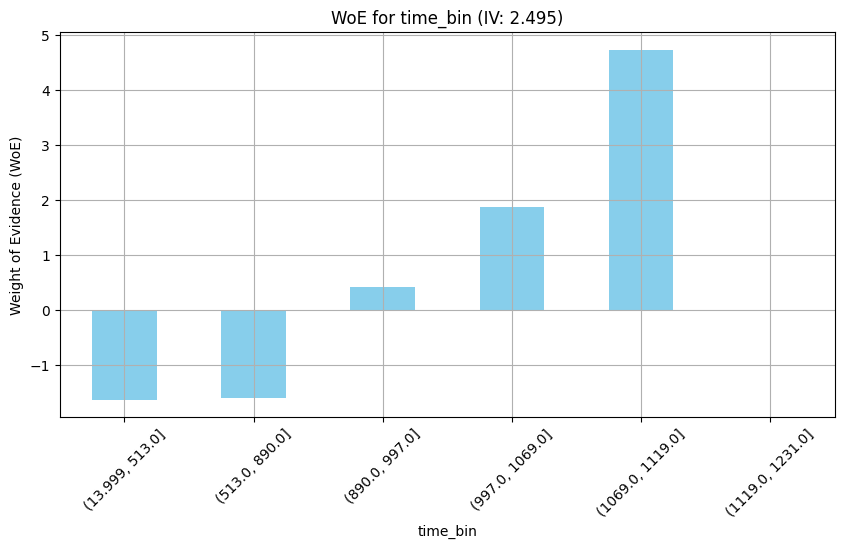

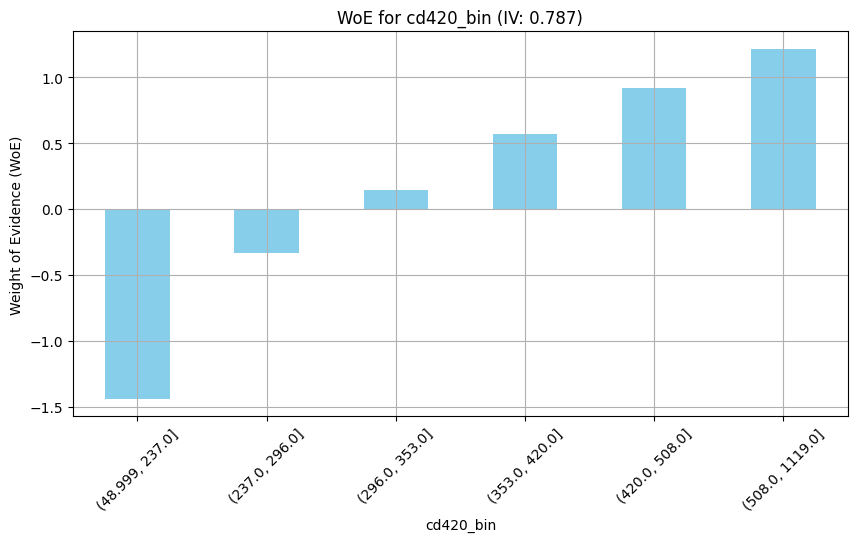

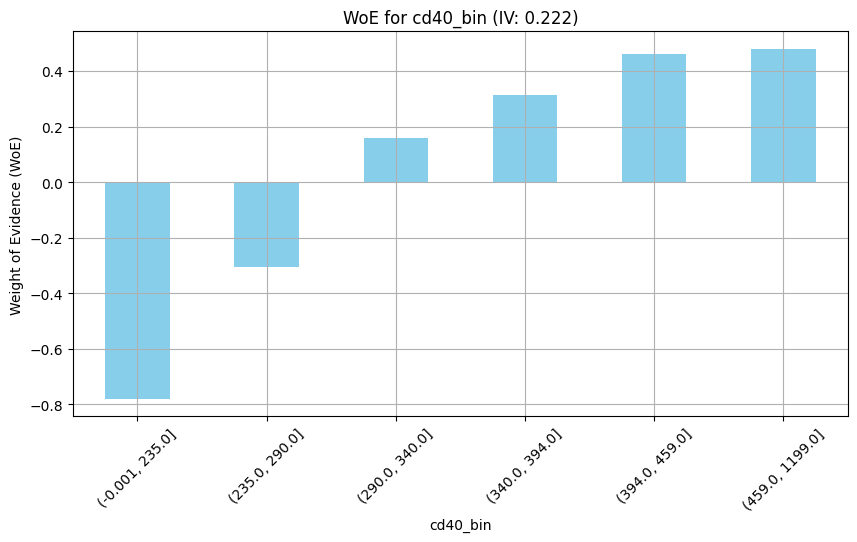

In [46]:
# Filtriranje varijabli s najvećim IV vrijednostima
top_iv_vars = iv_df.nlargest(3, 'Suma IV')['Variable']  
print(top_iv_vars)

# Stvaranje WoE grafova za svaku varijablu s najvećim IV-om
for var in top_iv_vars:
    _, woe_table = calculate_woe_iv(ct, var, 'cid')  
    # Grafički prikaz WoE vrijednosti
    plt.figure(figsize=(10, 5))
    woe_table['WoE'].plot(kind='bar', color='skyblue')
    plt.title(f"WoE for {var} (IV: {iv_values[var]:.3f})")
    plt.xlabel(var)
    plt.ylabel('Weight of Evidence (WoE)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


####	4.3 Grupirati razrede po kriteriju WoE za najjače varijable

Najjače varijable po IV-u su:<br>
time_bin (IV: 2.495)<br>
cd420_bin (IV: 0.786)<br>
cd40_bin (IV: 0.2217)<br>


Grupiranje razreda po kriteriju WoE za ove varijable obično uključuje sortiranje podataka po WoE i zatim određivanje pragova za podjelu podataka u grupe sličnog WoE. Ovo je važno za razvoj dobrih prediktivnih modela jer WoE pruža linearnu transformaciju logaritma omjera šansi, što je korisno u logističkoj regresiji.


time_bin:<br>
Grupa 1: (13.999, 513) s WoE -1.623 i Grupa 2: (513.0, 890.0) s -1.602287 ukazuju na veću vjerojatnost "neuspjeha" u ovim grupama.<br>
Grupa 3: (997, 1069) s WoE 1.874232 ukazuje na manju vjerojatnost "neuspjeha" u ovoj grupi.<br>
Grupa 4: (1069, 1119) s WoE 4.744540 ukazuje na vrlo visok pozitivan WoE, te sugerira da su pacijenti u ovoj grupi imali najbolje ishode. <br>

cd420_bin:<br>
Grupa 1:(48.999, 237) s WoE -1.442. Najniži raspon CD4 broja ima visok negativan WoE, što ukazuje na povećan rizik od "neuspjeha".<br>
Grupa 2:(508, 1119) s WoE 1.216. Visok pozitivan WoE ukazuje na znatno nižu vjerojatnost "neuspjeha" za ove pacijente.<br>

cd40_bin:<br>
Grupa 1:(0, 235) s WoE -0.780556 ukazuje na veću vjerojatnost "neuspjeha" u ovoj grupi.